<ipython-input-11-a07a86b543fc>:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(Phi_prime, phi, dx=1e-6)
<ipython-input-11-a07a86b543fc>:18: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(Phi, phi, dx=9e-6)
<ipython-input-11-a07a86b543fc>:24: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(u, phi, dx=1e-6)


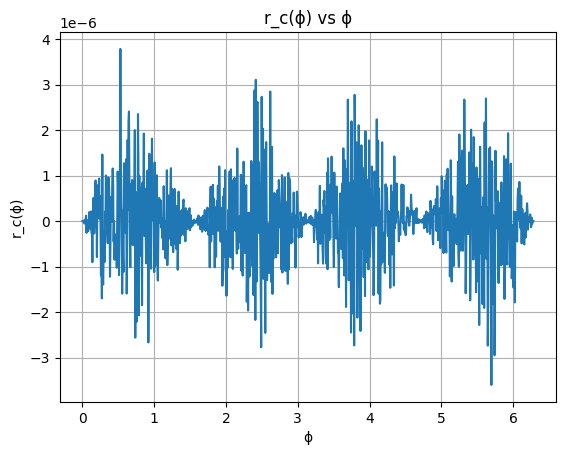

Audio file saved as output.wav. You can download it to listen.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.io.wavfile import write

# Define the parameters
k_perpendicular = 1.0  # You can change this value as needed

# User-defined functions for Φ(ϕ) and u(ϕ)
def Phi(phi):
    return np.sin(phi)  # Example function, modify as needed

def u(phi):
    return np.cos(phi)  # Example function, modify as needed

# Automatically compute the derivatives Φ'(ϕ), Φ''(ϕ), and u'(ϕ) using scipy's derivative function
def Phi_prime(phi):
    return derivative(Phi, phi, dx=1e-6)

def Phi_double_prime(phi):
    return derivative(Phi_prime, phi, dx=1e-6)

def u_prime(phi):
    return derivative(u, phi, dx=1e-6)

# Define the function rc(ϕ) based on the provided formula
def rc(phi):
    term1 = Phi_double_prime(phi) * u(phi)
    term2 = Phi_prime(phi) * u_prime(phi)
    return (1 / k_perpendicular) * (term1 - term2)

# Generate values for ϕ
phi_values = np.linspace(0, 2 * np.pi, 1000)

# Calculate rc(ϕ) for the generated ϕ values
rc_values = rc(phi_values)

# Plot rc(ϕ)
plt.plot(phi_values, rc_values)
plt.xlabel('ϕ')
plt.ylabel('r_c(ϕ)')
plt.title('r_c(ϕ) vs ϕ')
plt.grid(True)
plt.show()

# Normalize rc_values for audio playback
rc_values_normalized = rc_values / np.max(np.abs(rc_values))

# Set the sample rate
sample_rate = 44100

# Generate a time array for the duration of the audio
duration = 2  # seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Create the audio signal by interpolating rc_values to the length of the time array
audio_signal = np.interp(t, np.linspace(0, 2 * np.pi, len(rc_values_normalized)), rc_values_normalized)

# Convert audio signal to 16-bit PCM format
audio_signal_pcm = np.int16(audio_signal * 32767)

# Save the audio signal as a WAV file
wav_file = 'output.wav'
write(wav_file, sample_rate, audio_signal_pcm)

print(f"Audio file saved as {wav_file}. You can download it to listen.")
